In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
Qdata = pd.read_csv('QuasarData.txt', sep=' ', header = None, skipinitialspace=True)
Qdata.columns = ['Wavelength','FluxDensity','eFluxD']
print(Qdata)
Wavelength = Qdata['Wavelength']*0.1
FluxD = np.asarray(Qdata['FluxDensity'])

      Wavelength  FluxDensity  eFluxD
0          800.5        0.149   0.074
1          801.5        0.000   0.260
2          802.5        0.676   0.227
3          803.5        0.000   0.222
4          804.5        0.413   0.159
...          ...          ...     ...
7750      8550.5        0.733   0.056
7751      8551.5        0.723   0.049
7752      8552.5        0.718   0.054
7753      8553.5        0.776   0.046
7754      8554.5        0.792   0.065

[7755 rows x 3 columns]


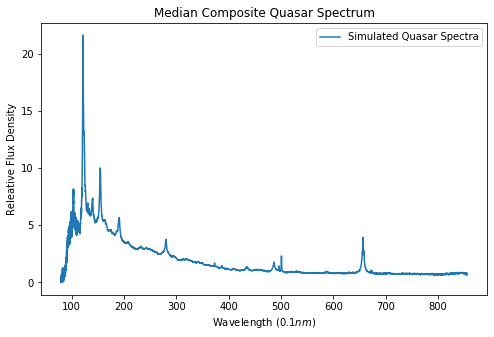

In [3]:
# Problem 1a
# want to plot spectrum of quasar (wavelength vs FluxDensity)
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(Wavelength, FluxD, label='Simulated Quasar Spectra')
ax.set_title('Median Composite Quasar Spectrum')
ax.set_xlabel('Wavelength $(0.1nm)$')
ax.set_ylabel('Releative Flux Density')
ax.legend(loc='best')
plt.show()

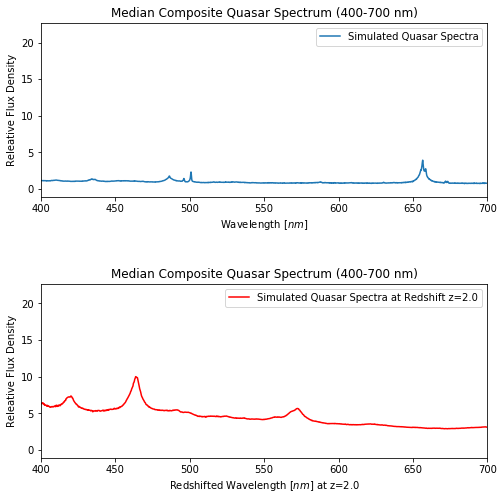

In [4]:
# Problem 1b
# Wavlengths = 400-700   ---- these are any wavelengths in table from 4000-7000
# create function that defines the observed wavelength based on emitted wavelength input at redshift of 0 and new redshift
def redshiftchange(zval, emit):
    observed = (1+zval) * (np.asarray(emit))
    return observed

z = 2.0  # set redshift to plot wavelengths observed at that redshift

# plot data only between (400 to 700)
redshiftedW = redshiftchange(z, Wavelength)


fig, ax = plt.subplots(2,1, figsize=(8,8))
ax0 = ax[0].plot(Wavelength, FluxD, label='Simulated Quasar Spectra')
ax[0].set_title('Median Composite Quasar Spectrum (400-700 nm)')
ax[0].set_xlabel('Wavelength $[nm]$')
ax[0].set_ylabel('Releative Flux Density')
ax[0].set_aspect('auto')
ax[0].set_xlim(400,700)
ax[0].legend(loc='best')

# plot at varying redshifts
ax1 = ax[1].plot(redshiftedW, FluxD, label=f'Simulated Quasar Spectra at Redshift z={z}', c='r')
ax[1].set_title('Median Composite Quasar Spectrum (400-700 nm)')
ax[1].set_xlabel(f'Redshifted Wavelength $[nm]$ at z={z}')
ax[1].set_ylabel('Releative Flux Density')
ax[1].legend(loc='best')
ax[1].set_aspect('auto')
ax[1].set_xlim(400,700)
fig.subplots_adjust(hspace=0.5)
plt.show()

In [5]:
# Problem 2A
# want total throughputs for g- and i-bands
# filepaths are 
# ASTR499/throughputs/baseline/total_g.dat and ASTR499/throughputs/baseline/total_i.dat

In [6]:
gband = pd.read_csv('throughputs/baseline/total_g.dat', sep=' ', header=7)
gband.columns = ['Wavelength','Throughput']
gWavelength = gband['Wavelength'][0:7755]
gThroughput = gband['Throughput'][0:7755]

iband = pd.read_csv('throughputs/baseline/total_i.dat', sep=' ', header=7)
iband.columns = ['Wavelength', 'Throughput']
iWavelength = iband['Wavelength'][0:7755]
iThroughput = iband['Throughput'][0:7755]

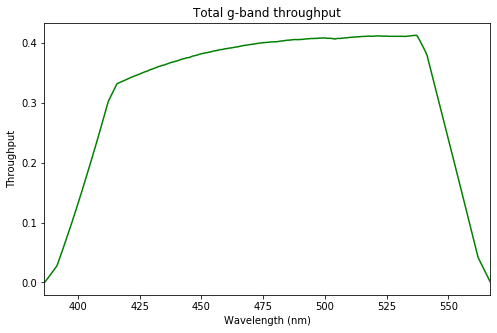

In [7]:
def pltthroughput(wavelength, thru, filterband, units=u.nm, minwl=None, maxwl=None, logscale=False, color=None):
    fig, ax = plt.subplots(figsize=(8,5))
    wavenm = wavelength*units
    plt.plot(wavenm, thru, color=color)
    wl_min = minwl if minwl is not None else np.min(wl)
    wl_max = maxwl if maxwl is not None else np.max(wl)
    ax.set_xlim(wl_min.value, wl_max.value)
    plt.title(f'Total {filterband}-band throughput')
    plt.xlabel(f'Wavelength ({units})')
    plt.ylabel('Throughput')
    if logscale:
        ax.set_yscale('log')
        
pltthroughput(gWavelength, gThroughput, 'g', minwl=386.30*u.nm, maxwl=567.0*u.nm, color='g')

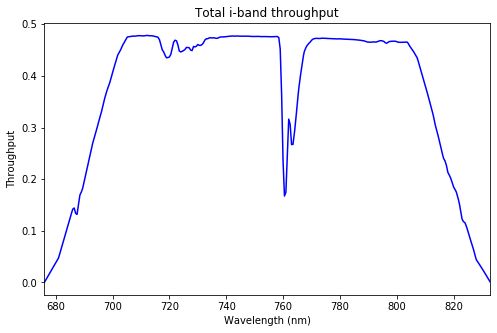

In [8]:
pltthroughput(iWavelength, iThroughput, 'i', minwl=675.90*u.nm, maxwl=833.0*u.nm, color='b')

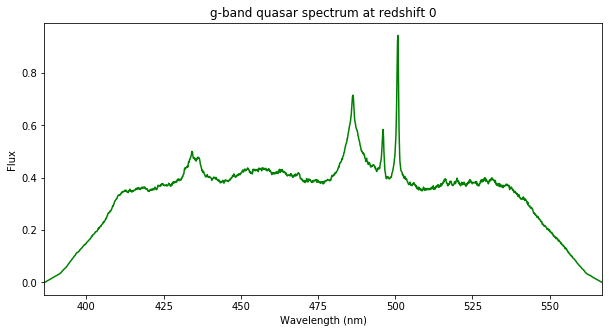

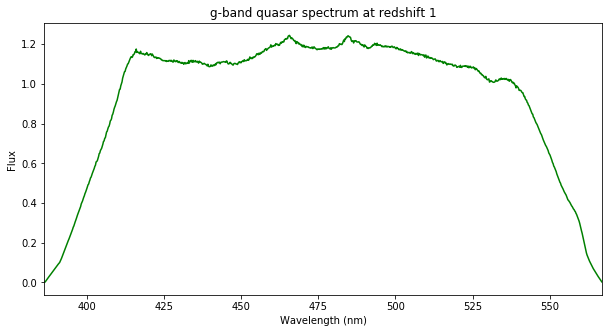

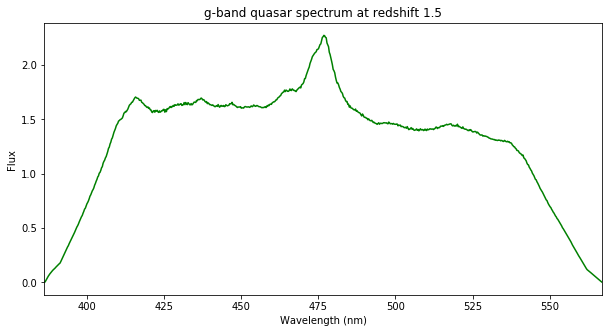

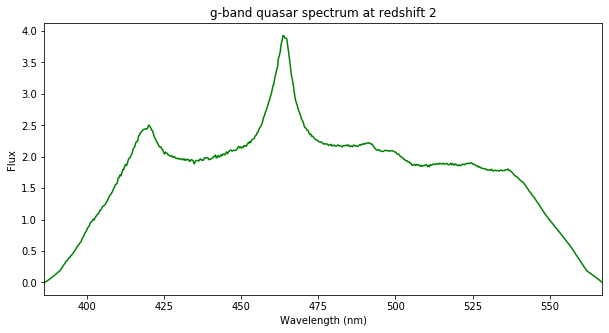

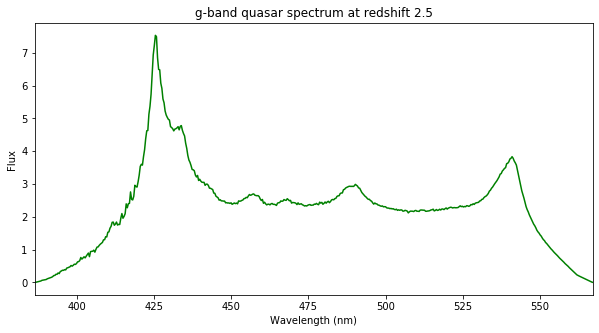

In [9]:
# select redshift you want to visualize

def pltFiltSpec(wavelength, flux, thru_wl, thru, filterband, units=u.nm, maxwl=None, minwl=None, redshift=0.0, color=None, logscale=None):
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    wl = wavelength * units * (1 + redshift)
    wl_thru = thru_wl * units
    interp = np.interp(wl, wl_thru, thru)
    ax.plot(wl, flux*interp, color)
    wl_min = minwl if minwl is not None else np.min(wl)
    wl_max = maxwl if maxwl is not None else np.max(wl)
    ax.set_xlim(wl_min.value, wl_max.value)
    plt.title(f'{filterband}-band quasar spectrum at redshift {redshift}')
    plt.xlabel(f'Wavelength ({units})')
    plt.ylabel('Flux')
    if logscale is not None:
        ax.set_yscale('log')
    plt.show()

    
for z in [0,1,1.5,2,2.5]:
    pltFiltSpec(Wavelength, FluxD, gWavelength, gThroughput, 'g', redshift=z, minwl=386.30*u.nm, maxwl=567*u.nm, color='g')

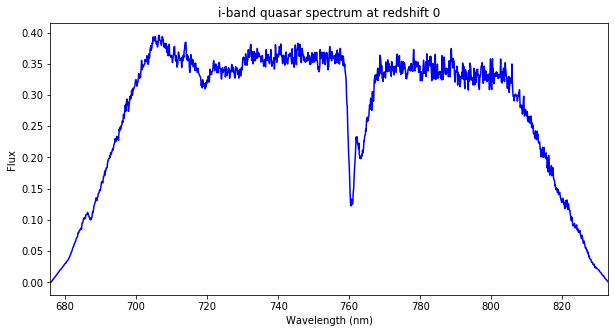

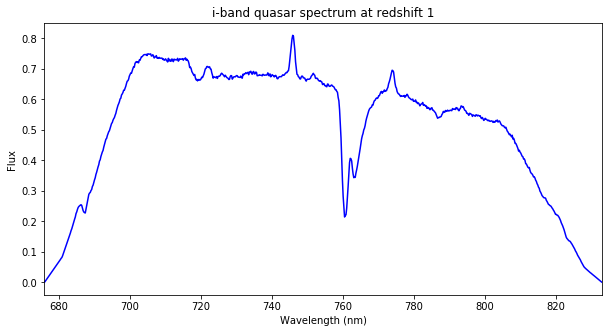

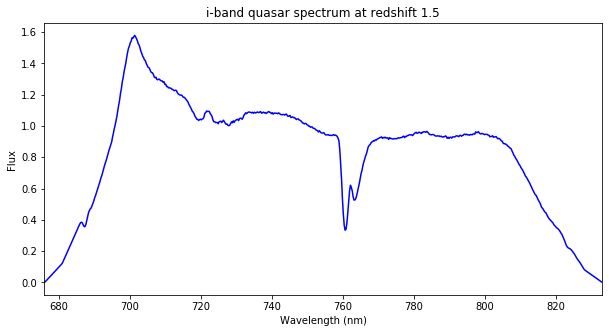

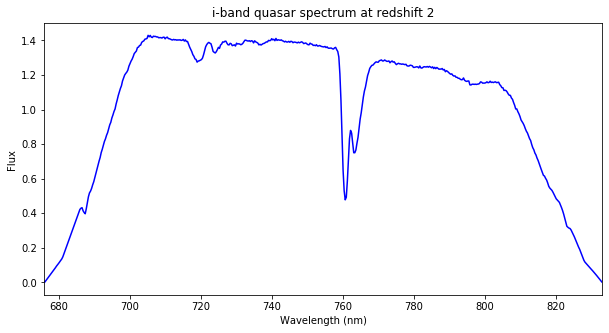

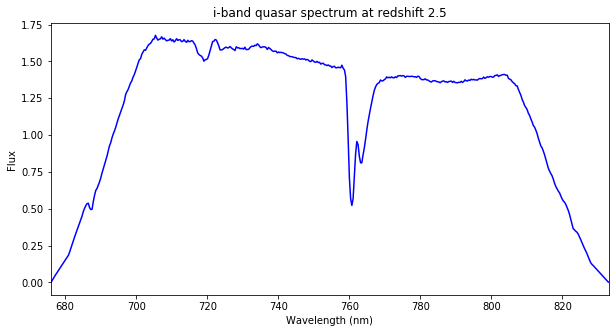

In [10]:
for redshift in [0,1,1.5,2,2.5]:
    pltFiltSpec(Wavelength, FluxD, iWavelength, iThroughput, 'i', redshift=redshift, minwl=675.90*u.nm, maxwl=833*u.nm, color='b')

In [11]:
# to get integrated total flux, sum(from wl1 to wl2)(thruFlux * lambda stepsize)

In [13]:
def FluxCalc(wavelength, flux, throughput_wl, throughput, band, units=u.nm, redshift=0., wavelength_min=None, wavelength_max=None):
    wlshift = wavelength * units * (1 + redshift)
    thruwl = throughput_wl*units
    interp = np.interp(wlshift, thruwl, throughput)
    wl_min = wavelength_min if wavelength_min is not None else np.min(wlshift)
    wl_max = wavelength_max if wavelength_max is not None else np.max(wlshift)
    flux_obs = flux*interp
    inds = np.where(np.logical_and(wlshift < wl_max.value, wlshift > wl_min.value))
    
    tot_flux = np.sum(flux_obs[inds])
    wl_stp = wlshift[1] - wlshift[0]
    return tot_flux*wl_stp

band = 'g'
for z in [0,1,1.5,2,2.5]:
    f = FluxCalc(Wavelength, FluxD, gWavelength, gThroughput, band, redshift=z)
    print(f'{band}-band | redshift {redshift} | flux={f}')

g-band | redshift 0 | flux=60.395566354922494
g-band | redshift 0 | flux=170.44063224360553
g-band | redshift 0 | flux=236.12240260164947
g-band | redshift 0 | flux=317.92926780865173
g-band | redshift 0 | flux=416.5770234454493


In [14]:
band = 'i'
for z in [0,1,1.5,2,2.5]:
    f = FluxCalc(Wavelength, FluxD, iWavelength, iThroughput, band, redshift=z)
    print(f'{band}-band | redshift {redshift} | flux={f}')

i-band | redshift 0 | flux=43.190849890271934
i-band | redshift 0 | flux=80.08202142728408
i-band | redshift 0 | flux=130.7910801633029
i-band | redshift 0 | flux=162.738352944738
i-band | redshift 0 | flux=186.37602527405707
